<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
import statsmodels.formula.api as sfa
plt.rcParams['figure.figsize']=[12,8]

from sklearn.model_selection import KFold

#### Load the first dataset and check the first two observations

In [2]:
# load your data

# type your code here
wine = pd.read_csv(r'winequality.csv',delimiter=';')

In [3]:
# check data types of variables
# type your code here
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

1.5769795029952025


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

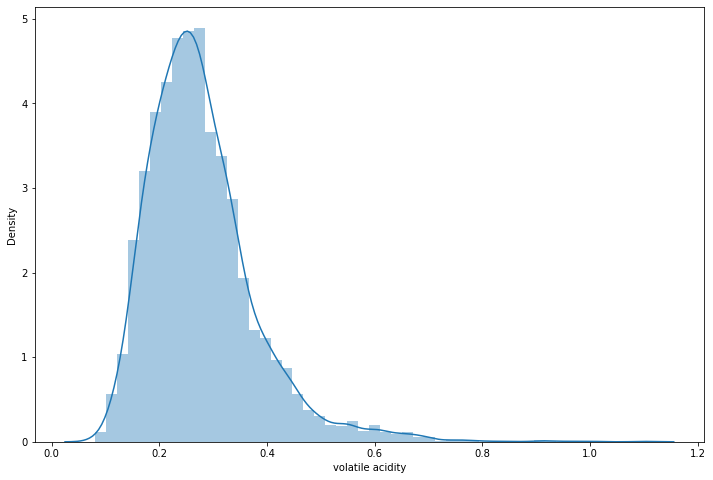

In [4]:
# type your code here
print(wine['volatile acidity'].skew())
sns.distplot(wine['volatile acidity'])

Inference:- 
    
    We can use the log transformation to reduse the skewness.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
print('Original data:',wine['residual sugar'].skew())
print('Tranformed data:',np.log(wine['residual sugar']).skew())

Original data: 1.0770937564240868
Tranformed data: -0.1611568975182972


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# The collumns that have Standard deviation close to 0 add no information to the model
# So we remove such features.

wine.std()

fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
quality                  0.885639
dtype: float64

The chlorides and density offer least information.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
print('Original skewness:   ',wine.alcohol.skew())
print('Boxcox skewness:     ',stats.skew(stats.boxcox(wine.alcohol)[0]))
print('yeojohnson skewness: ',stats.skew(stats.yeojohnson(wine.alcohol)[0]))
print('log skewness:        ',np.log(wine.alcohol).skew())
print('sqrt skewness:       ',np.sqrt(wine.alcohol).skew())
print('reciprocal skewness: ',np.reciprocal(wine.alcohol).skew())

Original skewness:    0.4873419932161276
Boxcox skewness:      0.05927793859085263
yeojohnson skewness:  0.06223253977335997
log skewness:         0.310134622964236
sqrt skewness:        0.39789094275901415
reciprocal skewness:  -0.13935230629934497


Here boxcox is best to transform and reduse the skewness.

<table align="left">
    <tr>
        <td width="5%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# Full model without scaling
from statsmodels.api import OLS, add_constant
new_wine = add_constant(wine)

x = new_wine.drop('quality',axis = 1)
y = new_wine.quality

In [9]:
# Model
OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:51:22   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Scale the ph
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

new_wine['pH']= sc.fit_transform(pd.DataFrame(wine.pH))

In [11]:
x = new_wine.drop('quality',axis = 1)
y = new_wine.quality

# Model
OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:51:22   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811     19.013      8.015      0.000     115.108     189.655
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.1036      0.016      6.513      0.000       0.072       0.135
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Scaling the pH has no effect on the model**

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
from statsmodels.stats.outliers_influence import variance_inflation_factor

new_data = wine.drop('quality',axis = 1)  # Input data

my_list = []

for i in range(new_data.shape[1]):
    my_list.append(variance_inflation_factor(new_data.values,i))

pd.DataFrame({"Feature":new_data.columns,'VIF':my_list})

,Feature,VIF
0,fixed acidity,92.861483
1,volatile acidity,9.730569
2,citric acid,10.007114
3,residual sugar,3.830272
4,chlorides,6.497448
5,free sulfur dioxide,9.261556
6,total sulfur dioxide,24.980802
7,density,1056.497431
8,pH,609.861725
9,sulphates,20.527123


if VIF > 10 so there is multicollinearity.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:51:26   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811     19.013      8.015      0.000     115.108     189.655
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.1036      0.016      6.513      0.000       0.072       0.135
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since jarque bera p value < 5%.
Yes, normality of residuals is voilated.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# Model without transformation.
x = new_wine.drop('quality',axis =1)
y = new_wine.quality

model1 = OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:51:29   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811     19.013      8.015      0.000     115.108     189.655
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.1036      0.016      6.513      0.000       0.072       0.135
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
new_wine['citric acid'].skew()

1.2819203981671066

In [16]:
new_wine['cirtic acid']=stats.yeojohnson(new_wine['citric acid'])[0]

In [17]:
# Model with yeojohnson transform
x= new_wine.drop('quality',axis = 1)
y = new_wine.quality

OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     162.9
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:51:34   Log-Likelihood:                -5530.3
No. Observations:                4898   AIC:                         1.109e+04
Df Residuals:                    4885   BIC:                         1.117e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  151.9376     18.963      8.012      0.000     114.762     189.114
fixed acidity            0.0541      0.021      2.586      0.010       0.013       0.095
volatile acidity        -1.6720      0.119    -14.009      0.000      -1.906      -1.438
citric acid             -2.2712      0.453     -5.012      0.000      -3.159      -1.383
residual sugar           0.0805      0.008     10.719      0.000       0.066       0.095
chlorides               -0.2645      0.545     -0.485      0.628      -1.333       0.804
free sulfur dioxide      0.0039      0.001      4.629      0.000       0.002       0.006
total sulfur dioxide    -0.0004      0.000     -1.153      0.249      -0.001       0.000
density               -150.0434     19.024     -7.887      0.000    -187.340    -112.747
pH                       0.1035      0.016      6.520      0.000       0.072       0.135
sulphates                0.6109      0.100      6.097      0.000       0.414       0.807
alcohol                  0.1837      0.024      7.582      0.000       0.136       0.231
cirtic acid              4.7800      0.923      5.177      0.000       2.970       6.590
==============================================================================
Omnibus:                      117.439   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.039
Skew:                           0.064   Prob(JB):                     2.80e-58
Kurtosis:                       4.132   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a very little bit difference between the models.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

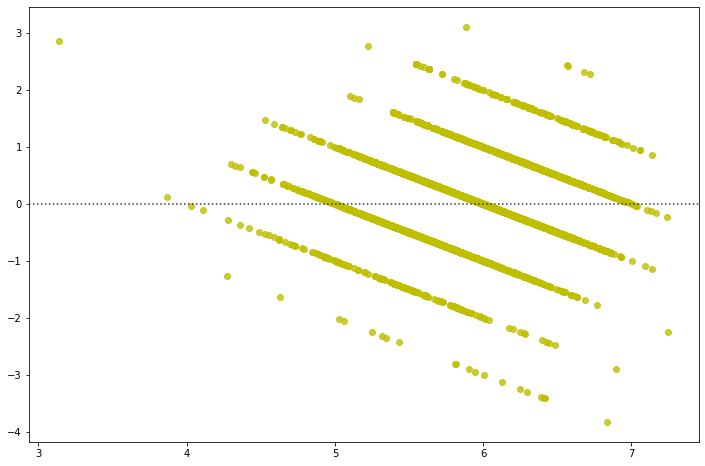

In [18]:
# type your code here
model = OLS(y,x).fit()
sns.residplot(x=model.fittedvalues,y=model.resid,color='y')
plt.show()

In [19]:
import statsmodels.api as sma

sma.stats.linear_rainbow(model)

(1.0595413367800204, 0.07652298740956599)

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
x = wine.drop('quality',axis = 1)
y = wine.quality

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

sfs = SequentialFeatureSelector(estimator = lr, k_features = 5,scoring ='neg_mean_squared_error',cv = 5,forward = True)
sfs.fit(x,y)
print('Features:',sfs.k_feature_names_)

Features: ('volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol')


In [22]:
x = wine.loc[:,['volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol']]
y = wine.quality

model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          5.875e+04
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:51:44   Log-Likelihood:                         -5611.2
No. Observations:                4898   AIC:                                  1.123e+04
Df Residuals:                    4893   BIC:                                  1.126e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
volatile acidity    -2.0933      0.109    -19.233      0.000      -2.307      -1.880
residual sugar       0.0281      0.002     11.336      0.000       0.023       0.033
density              1.1881      0.260      4.575      0.000       0.679       1.697
pH                   0.3638      0.074      4.922      0.000       0.219       0.509
alcohol              0.3747      0.010     38.037      0.000       0.355       0.394
==============================================================================
Omnibus:                       90.197   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.706
Skew:                           0.037   Prob(JB):                     1.28e-40
Kurtosis:                       3.946   Cond. No.                         320.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
from sklearn.feature_selection import RFECV
rfe = RFECV(estimator = lr,min_features_to_select= 5,scoring='neg_mean_squared_error')

In [24]:
x = wine.drop('quality',axis = 1)
y = wine.quality

rfe.fit(x,y)
x.columns[rfe.get_support()]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
x =wine.drop('quality',axis = 1)
y = wine.quality

sfe = SequentialFeatureSelector(estimator = lr, k_features = (2,6), scoring = 'neg_mean_squared_error', cv= 5, forward = True)
sfe.fit(x,y)
sfe.k_feature_names_

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'pH',
 'alcohol')

In [26]:
x = wine.loc[:,['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'alcohol']]
y = wine.quality

OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          4.929e+04
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:51:53   Log-Likelihood:                         -5594.6
No. Observations:                4898   AIC:                                  1.120e+04
Df Residuals:                    4892   BIC:                                  1.124e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
volatile acidity       -2.0257      0.109    -18.564      0.000      -2.240      -1.812
residual sugar          0.0248      0.003      9.762      0.000       0.020       0.030
free sulfur dioxide     0.0039      0.001      5.756      0.000       0.003       0.005
density                 1.0655      0.260      4.102      0.000       0.556       1.575
pH                      0.3360      0.074      4.551      0.000       0.191       0.481
alcohol                 0.3818      0.010     38.582      0.000       0.362       0.401
==============================================================================
Omnibus:                      103.325   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.521
Skew:                           0.038   Prob(JB):                     2.90e-49
Kurtosis:                       4.044   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
x = wine.drop('quality',axis = 1)
y = wine.quality

sfe = SequentialFeatureSelector(estimator =lr, k_features ='best',forward = True,scoring ='neg_mean_squared_error',cv = 5)

sfe.fit(x,y)
sfe.k_feature_names_

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [28]:
x =wine.loc[:,['volatile acidity','residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = wine.quality

OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          4.236e+04
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:51:57   Log-Likelihood:                         -5587.6
No. Observations:                4898   AIC:                                  1.119e+04
Df Residuals:                    4891   BIC:                                  1.123e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
volatile acidity       -2.0167      0.109    -18.502      0.000      -2.230      -1.803
residual sugar          0.0251      0.003      9.873      0.000       0.020       0.030
free sulfur dioxide     0.0038      0.001      5.553      0.000       0.002       0.005
density                 1.0072      0.260      3.876      0.000       0.498       1.517
pH                      0.2953      0.075      3.962      0.000       0.149       0.441
sulphates               0.3614      0.096      3.751      0.000       0.172       0.550
alcohol                 0.3829      0.010     38.727      0.000       0.364       0.402
==============================================================================
Omnibus:                      105.593   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.631
Skew:                           0.046   Prob(JB):                     1.37e-50
Kurtosis:                       4.057   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R-Squared - 0.984

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
x = wine.drop('quality',axis = 1)
y = wine.quality

sfe = SequentialFeatureSelector(estimator = lr, forward = False, k_features = 'best', scoring = 'neg_mean_squared_error',cv = 5)
sfe.fit(x,y)
sfe.k_feature_names_

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [30]:
# this is the same as the above model
x =wine.loc[:,['volatile acidity','residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = wine.quality

OLS(y,x).fit().summary()

# So both the model have same R-squared value

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          4.236e+04
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:52:00   Log-Likelihood:                         -5587.6
No. Observations:                4898   AIC:                                  1.119e+04
Df Residuals:                    4891   BIC:                                  1.123e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
volatile acidity       -2.0167      0.109    -18.502      0.000      -2.230      -1.803
residual sugar          0.0251      0.003      9.873      0.000       0.020       0.030
free sulfur dioxide     0.0038      0.001      5.553      0.000       0.002       0.005
density                 1.0072      0.260      3.876      0.000       0.498       1.517
pH                      0.2953      0.075      3.962      0.000       0.149       0.441
sulphates               0.3614      0.096      3.751      0.000       0.172       0.550
alcohol                 0.3829      0.010     38.727      0.000       0.364       0.402
==============================================================================
Omnibus:                      105.593   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.631
Skew:                           0.046   Prob(JB):                     1.37e-50
Kurtosis:                       4.057   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
x = wine.drop('quality',axis = 1)
y = wine.quality

sfe = SequentialFeatureSelector(estimator = lr, forward = False, k_features = (1,11),
                                scoring = 'neg_mean_squared_error',cv = 5)
sfe.fit(x,y)
sfe.k_feature_names_

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [32]:
# Model is same as in the question 13. and R-squared value is 0.984

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
new_wine = wine.loc[:,['volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol','quality']]
new_wine = add_constant(new_wine)

from sklearn.model_selection import train_test_split
x = new_wine.drop('quality',axis = 1)
y = new_wine.quality

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.20,random_state =0)

model = OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     295.4
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          7.49e-269
Time:                        20:52:05   Log-Likelihood:                -4391.4
No. Observations:                3918   AIC:                             8795.
Df Residuals:                    3912   BIC:                             8832.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               97.8460     14.888      6.572      0.000      68.657     127.035
volatile acidity    -2.0011      0.119    -16.805      0.000      -2.235      -1.768
residual sugar       0.0630      0.006     10.558      0.000       0.051       0.075
density            -96.6348     14.894     -6.488      0.000    -125.835     -67.434
pH                   0.5222      0.084      6.184      0.000       0.357       0.688
alcohol              0.2465      0.022     11.317      0.000       0.204       0.289
==============================================================================
Omnibus:                       84.388   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.841
Skew:                           0.135   Prob(JB):                     1.19e-35
Kurtosis:                       3.955   Cond. No.                     2.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# problem is what is the intercept bcoz of constant multicolinearity is high.
from sklearn.metrics import mean_squared_error
# to find the RMSE first fit model then collect all the slope and intercept and then find yhat, and find Rmse


<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# type your code here
wine.pH.unique()

# NO this feature is not significant as it shows acidic for every row because all the pH value are less than 7

array([3.  , 3.3 , 3.26, 3.19, 3.18, 3.22, 2.99, 3.14, 3.54, 2.98, 3.25,
       3.24, 3.33, 3.12, 3.17, 3.47, 3.05, 3.42, 3.45, 3.38, 3.1 , 3.2 ,
       3.37, 3.13, 3.21, 3.11, 3.16, 3.27, 3.36, 3.35, 3.34, 3.32, 3.31,
       3.09, 3.03, 3.02, 3.15, 3.69, 2.95, 2.94, 3.39, 3.04, 2.89, 3.4 ,
       3.01, 3.63, 3.29, 3.23, 3.28, 3.06, 3.08, 2.87, 2.93, 3.44, 3.5 ,
       3.48, 3.72, 3.53, 3.52, 2.96, 3.61, 3.43, 3.49, 3.51, 3.46, 3.07,
       2.97, 3.41, 3.64, 3.56, 2.86, 2.88, 2.85, 3.58, 3.55, 3.66, 3.59,
       2.74, 2.92, 3.82, 3.81, 3.65, 2.9 , 3.77, 2.91, 3.62, 3.74, 2.8 ,
       3.6 , 2.72, 2.79, 3.57, 3.8 , 3.68, 2.77, 3.79, 3.7 , 2.84, 3.76,
       2.83, 3.75, 2.82, 3.67])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
kfold = KFold(n_splits=5,shuffle = True)

x= wine.drop('quality',axis = 1)
y = wine.quality

my_list = []

for train_index,test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    xtest = x.loc[test_index]
    ytest = y.loc[test_index]
    my_list.append(lr.fit(xtrain,ytrain).predict(xtest))

In [44]:
final_pred = pd.DataFrame(my_list).T.mean(axis = 1)

In [45]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 Score:',r2_score(ytest,final_pred[1:]))
print('RMSE:',np.sqrt(mean_squared_error(ytest, final_pred[1:])))

R2 Score: -0.04387531043038417
RMSE: 0.9028835098234729


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# Same as above que.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here